# Inspecting AnnData Objects with Scanpy

This notebook demonstrates how to download and inspect AnnData objects using scanpy.

In [1]:
# Import required libraries
import os
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.sparse as sp
from scipy.io import mmwrite

# Set up scanpy settings
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

print(f"scanpy version: {sc.__version__}")

scanpy version: 1.11.4


## Load AnnData Object

Load your AnnData object from a local file or download from a URL.

In [2]:
# Load from local file
adata = sc.read_h5ad('data/downsampled_expression.h5ad')

print(adata)

AnnData object with n_obs × n_vars = 200000 × 32285
    obs: 'cell_barcode', 'library_label', 'anatomical_division_label'


## Basic Object Information

In [3]:
# Print basic information
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")
print(f"\nShape of expression matrix: {adata.X.shape}")
print(f"Matrix type: {type(adata.X)}")
print(f"Is sparse: {sp.issparse(adata.X)}")

Number of cells: 200000
Number of genes: 32285

Shape of expression matrix: (200000, 32285)
Matrix type: <class 'scipy.sparse._csr.csr_matrix'>
Is sparse: True


## Inspect Observations (Cells) Metadata

In [4]:
# View cell metadata
print("Cell metadata columns:")
print(adata.obs.columns.tolist())
print(f"\nFirst few rows of cell metadata:")
display(adata.obs.head())

Cell metadata columns:
['cell_barcode', 'library_label', 'anatomical_division_label']

First few rows of cell metadata:


,cell_barcode,library_label,anatomical_division_label
cell_label,,,
GTGCACGGTGACCTGC-106_E01,GTGCACGGTGACCTGC,L8TX_190327_01_E04,PAL
AGGGCTCGTTTACACG-417_C03,AGGGCTCGTTTACACG,L8TX_201106_01_B03,PAL
GGCAGTCTCGATGCAT-106_D01,GGCAGTCTCGATGCAT,L8TX_190327_01_D04,PAL
GTCCTCAGTCTGATAC-106_D01,GTCCTCAGTCTGATAC,L8TX_190327_01_D04,PAL
TTGTGTTGTAGCGCTC-127_A01,TTGTGTTGTAGCGCTC,L8TX_190614_01_E06,PAL


In [5]:
# Summary statistics of cell metadata
print("Summary of cell metadata:")
display(adata.obs.describe())

Summary of cell metadata:


,cell_barcode,library_label,anatomical_division_label
count,200000,200000,200000
unique,194250,815,12
top,TTGCCGTCACAGGAGT,L8TX_200306_01_A01,Isocortex
freq,3,1093,60654


## Inspect Variables (Genes) Metadata

In [6]:
# View gene metadata
print("Gene metadata columns:")
print(adata.var.columns.tolist())
print(f"\nFirst few rows of gene metadata:")
display(adata.var.head())

Gene metadata columns:
[]

First few rows of gene metadata:


""
gene_identifier
ENSMUSG00000051951
ENSMUSG00000089699
ENSMUSG00000102331
ENSMUSG00000102343
ENSMUSG00000025900


In [7]:
# Check gene names
print(f"First 20 gene names:")
print(adata.var_names[:20].tolist())

First 20 gene names:
['ENSMUSG00000051951', 'ENSMUSG00000089699', 'ENSMUSG00000102331', 'ENSMUSG00000102343', 'ENSMUSG00000025900', 'ENSMUSG00000025902', 'ENSMUSG00000104238', 'ENSMUSG00000104328', 'ENSMUSG00000033845', 'ENSMUSG00000025903', 'ENSMUSG00000033813', 'ENSMUSG00000002459', 'ENSMUSG00000085623', 'ENSMUSG00000033793', 'ENSMUSG00000025905', 'ENSMUSG00000033774', 'ENSMUSG00000025907', 'ENSMUSG00000090031', 'ENSMUSG00000087247', 'ENSMUSG00000033740']


## Inspect Unstructured Annotations

In [8]:
# Check what's stored in uns (unstructured annotations)
print("Unstructured annotations (uns):")
print(adata.uns.keys())

Unstructured annotations (uns):
odict_keys([])


## Inspect Layers

In [9]:
# Check available layers
print("Available layers:")
if adata.layers:
    for layer_name in adata.layers.keys():
        print(f"  - {layer_name}: {adata.layers[layer_name].shape}")
else:
    print("  No additional layers")

Available layers:
  No additional layers


## Inspect Dimensionality Reductions

In [10]:
# Check available obsm (multidimensional observations)
print("Dimensionality reductions (obsm):")
if adata.obsm:
    for key in adata.obsm.keys():
        print(f"  - {key}: {adata.obsm[key].shape}")
else:
    print("  No dimensionality reductions stored")

Dimensionality reductions (obsm):
  No dimensionality reductions stored


## Inspect Graphs and Connectivity

In [11]:
# Check available obsp (pairwise observations)
print("Pairwise cell annotations (obsp):")
if adata.obsp:
    for key in adata.obsp.keys():
        print(f"  - {key}: {adata.obsp[key].shape}")
else:
    print("  No pairwise annotations")

Pairwise cell annotations (obsp):
  No pairwise annotations


## Quality Control Metrics

In [12]:
# Calculate basic QC metrics if not already present
if 'n_genes_by_counts' not in adata.obs.columns:
    sc.pp.calculate_qc_metrics(adata, inplace=True)

# Display QC metrics
qc_cols = [col for col in adata.obs.columns if any(x in col for x in ['n_genes', 'n_counts', 'pct_counts'])]
if qc_cols:
    display(adata.obs[qc_cols].describe())

,n_genes_by_counts,log1p_n_genes_by_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,4982.554410,8.424765,19.617173,26.217309,34.711350,49.477148
std,2000.613417,0.439483,5.275058,5.538949,5.681295,5.944022
min,503.000000,6.222576,9.485858,14.033872,20.985836,35.127994
25%,3379.000000,8.125631,16.054138,22.367688,30.694803,45.214311
50%,4691.000000,8.453614,17.915682,24.477640,32.990990,47.813696
75%,6546.000000,8.786762,21.161821,28.245574,37.187006,52.668731
max,11614.000000,9.360053,61.539139,65.601436,76.696589,99.589041


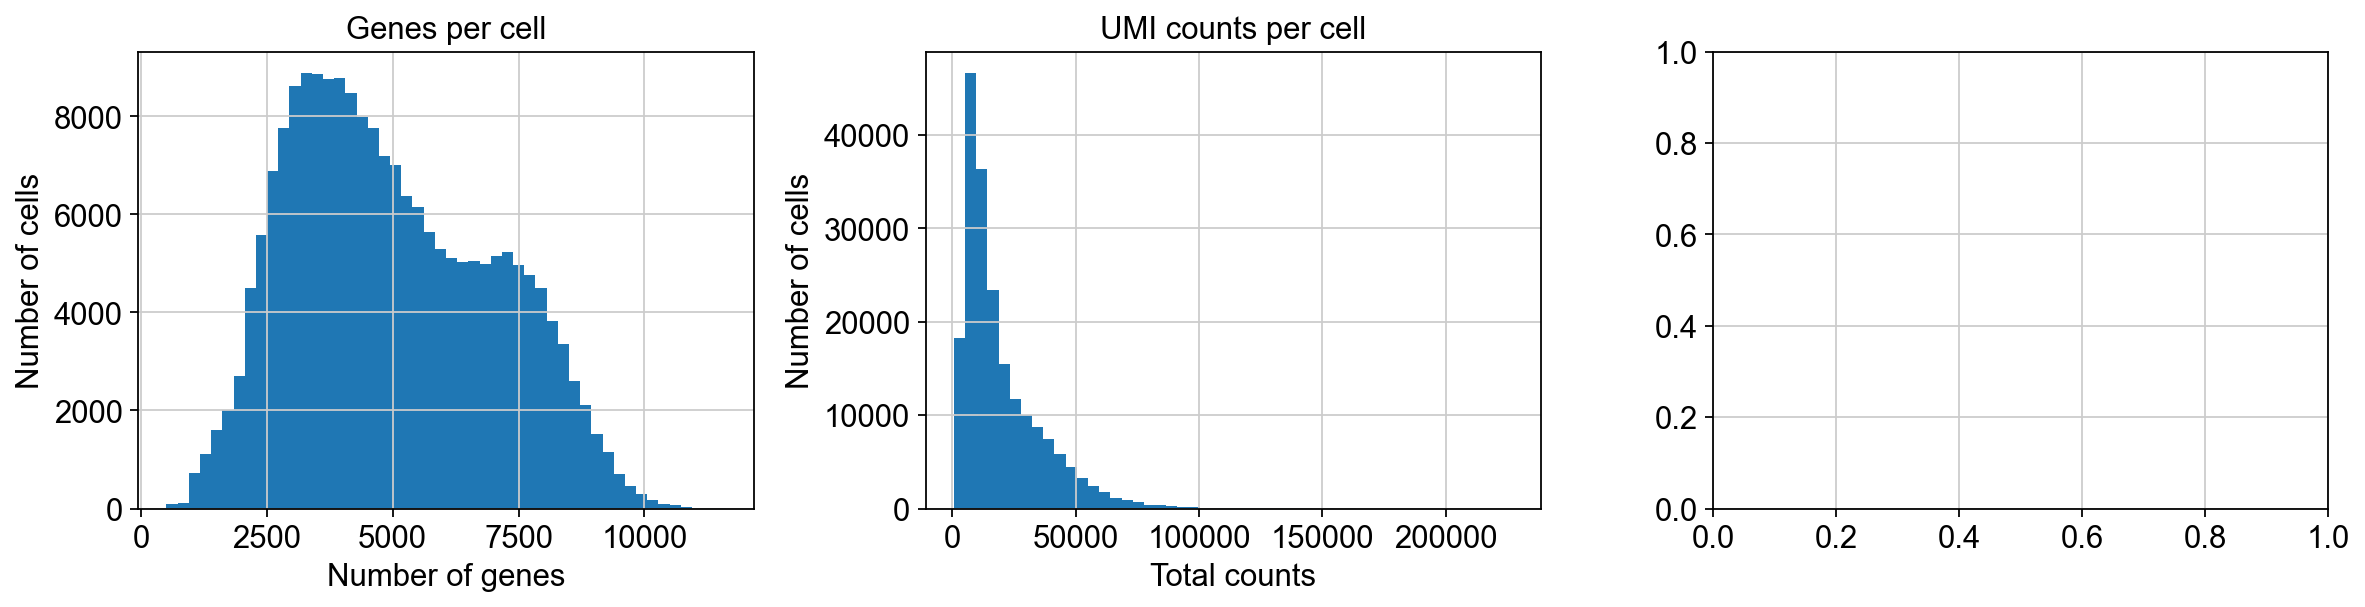

In [13]:
# Plot QC metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

if 'n_genes_by_counts' in adata.obs.columns:
    axes[0].hist(adata.obs['n_genes_by_counts'], bins=50)
    axes[0].set_xlabel('Number of genes')
    axes[0].set_ylabel('Number of cells')
    axes[0].set_title('Genes per cell')

if 'total_counts' in adata.obs.columns:
    axes[1].hist(adata.obs['total_counts'], bins=50)
    axes[1].set_xlabel('Total counts')
    axes[1].set_ylabel('Number of cells')
    axes[1].set_title('UMI counts per cell')

if 'pct_counts_mt' in adata.obs.columns:
    axes[2].hist(adata.obs['pct_counts_mt'], bins=50)
    axes[2].set_xlabel('% mitochondrial counts')
    axes[2].set_ylabel('Number of cells')
    axes[2].set_title('Mitochondrial percentage')

plt.tight_layout()
plt.show()

## Visualizations

In [14]:
# Plot UMAP if available
if 'X_umap' in adata.obsm.keys():
    sc.pl.umap(adata, color=['n_genes_by_counts', 'total_counts'], 
               ncols=2, frameon=False)
else:
    print("UMAP coordinates not found in adata.obsm")

UMAP coordinates not found in adata.obsm


In [15]:
# Plot cluster assignments if available
cluster_cols = [col for col in adata.obs.columns if any(x in col.lower() for x in ['cluster', 'leiden', 'louvain', 'celltype'])]
if cluster_cols and 'X_umap' in adata.obsm.keys():
    sc.pl.umap(adata, color=cluster_cols[:4], ncols=2, frameon=False)
else:
    print("No cluster annotations found or UMAP not available")

No cluster annotations found or UMAP not available


## Check Specific Genes

In [16]:
# Check if microglial markers are present
microglial_markers = ['P2ry12', 'Tmem119', 'Cx3cr1', 'Aif1', 'Trem2', 'Apoe']

present_markers = [gene for gene in microglial_markers if gene in adata.var_names]
missing_markers = [gene for gene in microglial_markers if gene not in adata.var_names]

print(f"Present markers: {present_markers}")
print(f"Missing markers: {missing_markers}")

Present markers: []
Missing markers: ['P2ry12', 'Tmem119', 'Cx3cr1', 'Aif1', 'Trem2', 'Apoe']


In [17]:
# Plot expression of present markers
if present_markers and 'X_umap' in adata.obsm.keys():
    sc.pl.umap(adata, color=present_markers[:6], ncols=3, frameon=False)

## Export Summary Information

In [18]:
# Create a comprehensive summary
summary = {
    'n_cells': adata.n_obs,
    'n_genes': adata.n_vars,
    'obs_columns': adata.obs.columns.tolist(),
    'var_columns': adata.var.columns.tolist(),
    'uns_keys': list(adata.uns.keys()),
    'layers': list(adata.layers.keys()) if adata.layers else [],
    'obsm_keys': list(adata.obsm.keys()) if adata.obsm else [],
    'obsp_keys': list(adata.obsp.keys()) if adata.obsp else []
}

print("\nAnnData Object Summary:")
print("=" * 50)
for key, value in summary.items():
    print(f"{key}: {value}")


AnnData Object Summary:
n_cells: 200000
n_genes: 32285
obs_columns: ['cell_barcode', 'library_label', 'anatomical_division_label', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes']
var_columns: ['n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts']
uns_keys: []
layers: []
obsm_keys: []
obsp_keys: []


In [27]:
# Create data directory if it doesn't exist
os.makedirs('data/mtx', exist_ok=True)

print(f"Saving to: {os.path.abspath('data/mtx')}")

# Ensure matrix is in CSC format
if sp.issparse(adata.X):
    sparse_csc = adata.X.tocsc()
else:
    sparse_csc = sp.csc_matrix(adata.X)

# Save sparse matrix in Matrix Market format
mmwrite('data/mtx/expression_matrix.mtx', sparse_csc)
print("Saved data/mtx/expression_matrix.mtx")

# Save cell names (barcodes)
with open('data/mtx/barcodes.tsv', 'w') as f:
    f.write('\n'.join(adata.obs_names))
print(f"Saved data/mtx/barcodes.tsv ({len(adata.obs_names)} cells)")

# Save gene names (features)
with open('data/mtx/features.tsv', 'w') as f:
    f.write('\n'.join(adata.var_names))
print(f"Saved data/mtx/features.tsv ({len(adata.var_names)} genes)")

# Save full metadata
adata.obs.to_csv('data/mtx/cell_metadata.csv')
adata.var.to_csv('data/mtx/gene_metadata.csv')
print("Saved data/mtx/cell_metadata.csv and data/gene_metadata.csv")

# Verify files were created
print(f"\n{'='*60}")
print("Files in data/mtx/ directory:")
print(f"{'='*60}")
for f in os.listdir('data/mtx/'):
    if f.endswith(('.mtx', '.tsv', '.csv')):
        filepath = os.path.join('data/mtx/', f)
        size_mb = os.path.getsize(filepath) / (1024 * 1024)
        print(f"  {f}: {size_mb:.2f} MB")

print(f"\nAll files saved to: {os.path.abspath('data/mtx/')}")

Saving to: /Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/data/mtx
Saved data/mtx/expression_matrix.mtx
Saved data/mtx/barcodes.tsv (200000 cells)
Saved data/mtx/features.tsv (32285 genes)
Saved data/mtx/cell_metadata.csv and data/gene_metadata.csv

Files in data/mtx/ directory:
  features.tsv: 0.58 MB
  gene_metadata.csv: 2.63 MB
  barcodes.tsv: 4.80 MB
  cell_metadata.csv: 36.02 MB
  expression_matrix.mtx: 13545.90 MB

All files saved to: /Users/arbones/Dropbox/SyncBriefcase/LAB/UK/zz-Allen/data/mtx
